In [2]:
from mt.definitions import REPO_DIR

In [29]:
dict(gen_deps.GenerateDependency(REPO_DIR / "pytorch/vision", "").get_import_map())

{'repo.hubconf': {'torchvision.models',
  'torchvision.models.alexnet',
  'torchvision.models.convnext',
  'torchvision.models.densenet',
  'torchvision.models.efficientnet',
  'torchvision.models.googlenet',
  'torchvision.models.inception',
  'torchvision.models.maxvit',
  'torchvision.models.mnasnet',
  'torchvision.models.mobilenetv2',
  'torchvision.models.mobilenetv3',
  'torchvision.models.optical_flow',
  'torchvision.models.regnet',
  'torchvision.models.resnet',
  'torchvision.models.segmentation',
  'torchvision.models.shufflenetv2',
  'torchvision.models.squeezenet',
  'torchvision.models.swin_transformer',
  'torchvision.models.vgg',
  'torchvision.models.video',
  'torchvision.models.vision_transformer'},
 'repo.setup': {'setuptools',
  'shutil',
  'subprocess',
  'sys',
  'torch',
  'torch.utils.cpp_extension',
  'torch.utils.hipify'},
 'repo.test.conftest': {'torch'},
 'repo.test.test_image': {'sys',
  'torch',
  'torchvision.io.image',
  'torchvision.transforms.functio

In [26]:
from snakefood3 import gen_deps
from uuid6 import uuid7
from collections import defaultdict
import networkx as nx

repo = REPO_DIR / "pytorch/vision"
module_to_uuid = defaultdict(uuid7)
G = nx.DiGraph()

for file, graph in gen_deps.GenerateDependency(REPO_DIR / "pytorch/vision", "").get_import_map().items():
    fixed_filename = f'{repo}/{file.replace(".", "/")}.py'
    for mod in graph:
        while "." in mod:
            r_mod, l_mod = mod.rsplit(".", maxsplit=1)
            G.add_node(module_to_uuid[r_mod].hex)
            G.add_node(module_to_uuid[l_mod].hex)
    

{'torchvision.models.efficientnet', 'torchvision.models.shufflenetv2', 'torchvision.models.regnet', 'torchvision.models.optical_flow', 'torchvision.models.mobilenetv3', 'torchvision.models.mobilenetv2', 'torchvision.models.inception', 'torchvision.models.video', 'torchvision.models.swin_transformer', 'torchvision.models.segmentation', 'torchvision.models.densenet', 'torchvision.models.convnext', 'torchvision.models.vgg', 'torchvision.models.mnasnet', 'torchvision.models.alexnet', 'torchvision.models.maxvit', 'torchvision.models.vision_transformer', 'torchvision.models.resnet', 'torchvision.models.googlenet', 'torchvision.models.squeezenet', 'torchvision.models'}
{'torch.utils.hipify', 'sys', 'torch', 'subprocess', 'shutil', 'setuptools', 'torch.utils.cpp_extension'}
{'torch'}
{'torchvision.io.image', 'sys', 'torch', 'torchvision.transforms.functional'}
{'torchdata.datapipes.iter', 'torchvision.prototype.datasets.utils', 'sys', 'torch', 'torchvision.datasets._optical_flow', 'torchvision

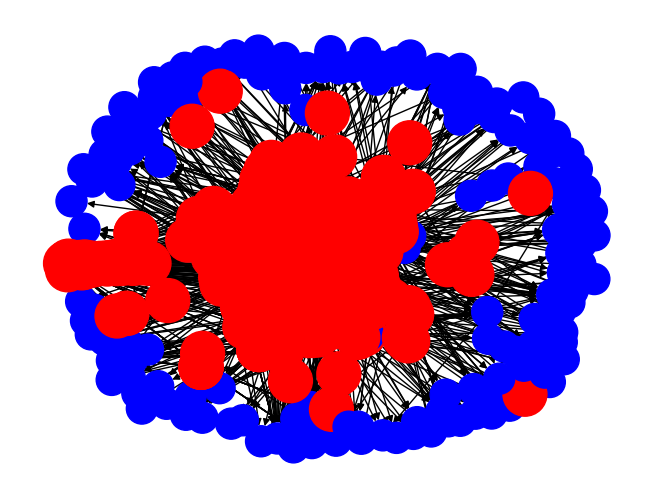

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Function to add hierarchical edges
def add_hierarchy_edges(module):
    parts = module.split('.')
    for i in range(1, len(parts)):
        parent = '.'.join(parts[:i])
        child = '.'.join(parts[:i+1])
        if parent not in G:
            G.add_node(parent, type='module')
        if child not in G:
            G.add_node(child, type='module')
        G.add_edge(parent, child)

# Add nodes and edges for modules
for file, modules in gen_deps.GenerateDependency(REPO_DIR / "pytorch/vision", "").get_import_map().items():
    fixed_filename = f'{file.replace(".", "/")}.py'
    G.add_node(fixed_filename, type='file')
    for module in modules:
        if module not in G:
            G.add_node(module, type='module')
        G.add_edge(fixed_filename, module)
        add_hierarchy_edges(module)

# Function to visualize the graph
def draw_graph(G):
    pos = nx.spring_layout(G)
    node_colors = ['red' if G.nodes[node].get('type') == 'file' else 'blue' for node in G.nodes]
    node_sizes = [1000 if G.nodes[node].get('type') == 'file' else 500 for node in G.nodes]
    
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=node_sizes, font_size=10, font_weight='bold')
    plt.show()

# Draw the graph
draw_graph(G)


In [8]:
import pathlib
from import_deps import ModuleSet

# First initialise a ModuleSet instance with a list str of modules to track
pkg_paths = pathlib.Path(REPO_DIR / "pytorch/vision").glob('**/*.py')
module_set = ModuleSet([str(p) for p in pkg_paths])


print(module_set.get_imports())
# for mod in sorted(module_set.by_name.keys()):
#     print(mod)

AttributeError: 'str' object has no attribute 'path'

In [4]:
import pyan
from IPython.display import HTML

glob = "/home/fox/projects/general/learning-portfolio/university/masters/masters-thesis/data/repos/pytorch/vision/repo/**/*.py"

HTML(pyan.create_callgraph(filenames=glob, format="html"))

ValueError: Unknown scope 'torchvision.prototype.utils._internal.add_suggestion.lambda'

In [ ]:
pyan.

In [7]:
modulegraph.modulegraph("/home/fox/projects/general/learning-portfolio/university/masters/masters-thesis/data/repos/pytorch/vision/repo/torchvision/extension.py")

AttributeError: module 'modulegraph' has no attribute 'modulegraph'

In [1]:
# from scalpel.cfg import CFGBuilder
from tree_sitter_languages import get_parser
import networkx as nx

In [7]:
src= """
from functools import cache

from mt.something import super_func

@cache
def fib():
    a, b = 0, 1
    while True:
        yield a
        a, b = b, a + b        

fib_gen = fib()
for _ in range(10):
    next(fib_gen)
    super_func(2)

    
def fib():
    return 1

fib()
"""


In [8]:
from py2cfg import CFGBuilder, CFG

cfg = CFGBuilder().build_from_src("Test", src)
cfg

In [9]:
cfg.build_visual("png", "png")

'png.png'

Gtk-Message: 05:38:20.553: Failed to load module "colorreload-gtk-module"
[25527:25527:0518/053820.562932:ERROR:policy_logger.cc(157)] :components/enterprise/browser/controller/chrome_browser_cloud_management_controller.cc(161) Cloud management controller initialization aborted as CBCM is not enabled. Please use the `--enable-chrome-browser-cloud-management` command line flag to enable it if you are not using the official Google Chrome build.
[25527:25630:0518/053820.630762:ERROR:object_proxy.cc(576)] Failed to call method: org.freedesktop.DBus.Properties.Get: object_path= /org/freedesktop/UPower: org.freedesktop.DBus.Error.ServiceUnknown: The name org.freedesktop.UPower was not provided by any .service files
[25527:25630:0518/053820.631015:ERROR:object_proxy.cc(576)] Failed to call method: org.freedesktop.UPower.GetDisplayDevice: object_path= /org/freedesktop/UPower: org.freedesktop.DBus.Error.ServiceUnknown: The name org.freedesktop.UPower was not provided by any .service files
[2552

In [14]:
# G = nx.DiGraph()

for node in cfg:
    print(node.get_calls())
    # print(node.statements)
    for statement in node.statements:
        print(statement)
        print(statement.lineno, statement.end_lineno)
        print(statement.col_offset, statement.end_col_offset)
    # print(node.statements[0])
    # print(dir(node.exits[0].source))
    # print()

fib

2 2
0 27
4 4
0 35
7 11
0 23
13 13
0 15
range

14 16
0 17
next
super_func

15 15
4 17
16 16
4 17
fib

19 20
0 12
22 22
0 5

20 20
4 12


In [78]:
dir(cfg)

['DEFAULT',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_key_subgraph',
 '_build_visual',
 '_edge_handler',
 '_style_handler',
 '_visit_blocks',
 '_visit_func',
 'asynchr',
 'border_style',
 'bsearch',
 'build_key',
 'build_visual',
 'classcfgs',
 'edge_For',
 'edge_If',
 'edge_While',
 'end_lineno',
 'entryblock',
 'fillcolor',
 'finalblocks',
 'find_path',
 'functioncfgs',
 'highlight_blocks',
 'highlighted_blocks',
 'isShort',
 'lineno',
 'name',
 'node_ClassDef',
 'node_Try',
 'node_styles',
 'outline_block',
 'outlined_block',
 'own_blocks',
 'qualname',
 'stylize_edge',
 'stylize_node',
 'subgraphs']

In [75]:
cfg.get_all_blocks()[0]

AttributeError: 'CFG' object has no attribute 'get_all_blocks'

In [27]:
[x for x in dir(cfg.get_all_blocks()[0]) if not x.startswith("__")]

['at',
 'exits',
 'func_calls',
 'get_calls',
 'get_source',
 'id',
 'is_empty',
 'predecessors',
 'statements']

In [62]:
cfg.get_all_blocks()[0].exits[0].get_exitcase()

''

In [54]:
import networkx as nx
import uuid

def cfg_to_networkx(cfg):
    G = nx.DiGraph()
    
    # Add nodes to the graph
    blocks = cfg.get_all_blocks()
    block_map = {}
    for block in blocks:
        block_id = uuid.uuid4().hex  # Unique ID for each block
        block_map[block] = block_id
        G.add_node(block_id, label=block.id)
        G.nodes[block_id]['source'] = block.get_source()

    # Add edges to the graph
    for block in blocks:
        block_id = block_map[block]
        for link in block.exits:
            exit_block = link.target
            exit_block_id = block_map[exit_block]
            G.add_edge(block_id, exit_block_id, type="exit")
    
    return G

nx_cfg = cfg_to_networkx(cfg)
nx_cfg

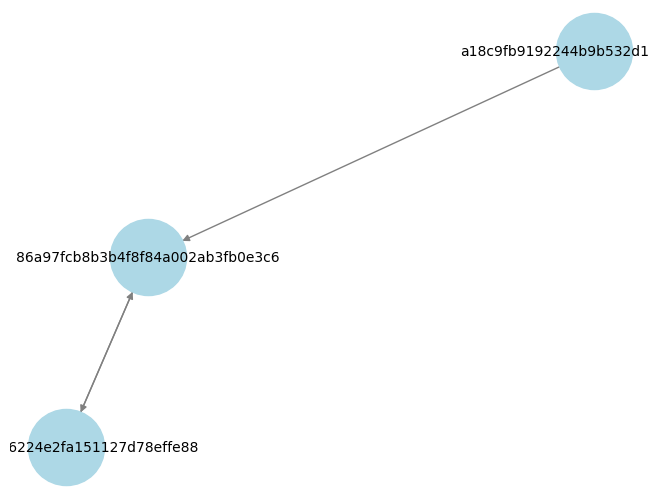

In [55]:
import matplotlib.pyplot as plt

def draw_cfg(nx_cfg):
    pos = nx.spring_layout(nx_cfg)
    nx.draw(nx_cfg, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_color='black', edge_color='gray')
    plt.show()

draw_cfg(nx_cfg)

In [24]:
def cfg_to_networkx(cfg):
    G = nx.DiGraph()
    
    # Add nodes to the graph
    blocks = cfg.get_all_blocks()
    for block in blocks:
        G.add_node(block.id, label=block.id)
        
    # Add edges to the graph
    for block in blocks:
        for link in block.exits:
            G.add_edge(block.id, link.block.id)
    
    return G

nx_cfg = cfg_to_networkx(cfg)
nx_cfg

AttributeError: 'Link' object has no attribute 'block'

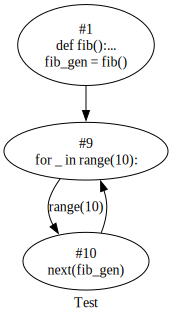

In [56]:
cfg.build_visual("png")

In [20]:
dir(cfg.get_all_blocks()[0])

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 'at',
 'exits',
 'func_calls',
 'get_calls',
 'get_source',
 'id',
 'is_empty',
 'predecessors',
 'statements']

In [ ]:
def cfg_to_nx(cfg: CFG) -> nx.DiGraph:
    G = nx.DiGraph()

    blocks = cfg.get_all_blocks()
    for block in blocks:
        G.add_node(block.name, label = block.name)
    
    for block in blocks:
        for edge in block.edges